In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Estimations
The dataset contains 4 columns : title, contain, ticker, date
each row is an article related to a company ticker and published at a specific date
The date is in format DD/MM/YY HH:MM

In [4]:
df = pd.read_csv('20_month_scraping_v2.csv', sep=';', encoding='utf-8')

In [5]:
# order the dataframe by date
def compare_date(date):
    date_str = date.split(' ')[0].split('/')
    hour_str = date.split(' ')[1].split(':')
    date_int = date_str[2] + date_str[1] + date_str[0] + hour_str[0] + hour_str[1]
    return int(date_int)

# create a new column with the date in the format YYYYMMDD, like a timestamp
df['sorting'] = df['date'].apply(compare_date)

#order the dataframe by date
df = df.sort_values(by=['sorting'])

In [6]:
print("For each simulation, we will approximately show one article every " + str((round(3600/(len(df)/10)))) + " seconds during 1h")

For each simulation, we will approximately show one article every 10 seconds during 1h


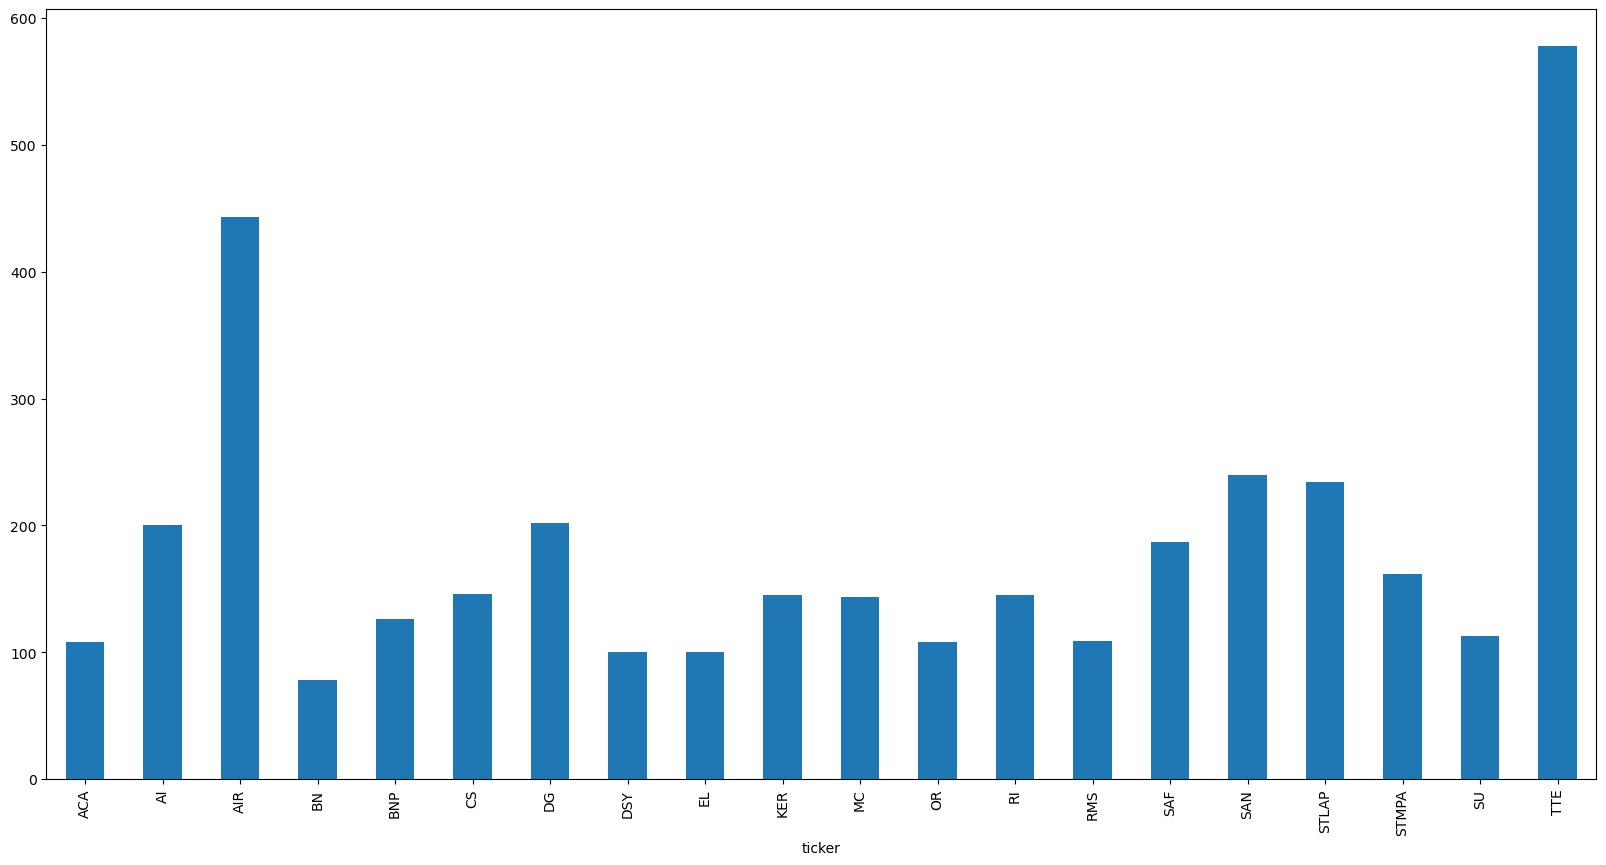

In [7]:
# a plot of the number of articles per ticker
df.groupby(['ticker']).count()['title'].plot(kind='bar', figsize=(20,10))
plt.show()

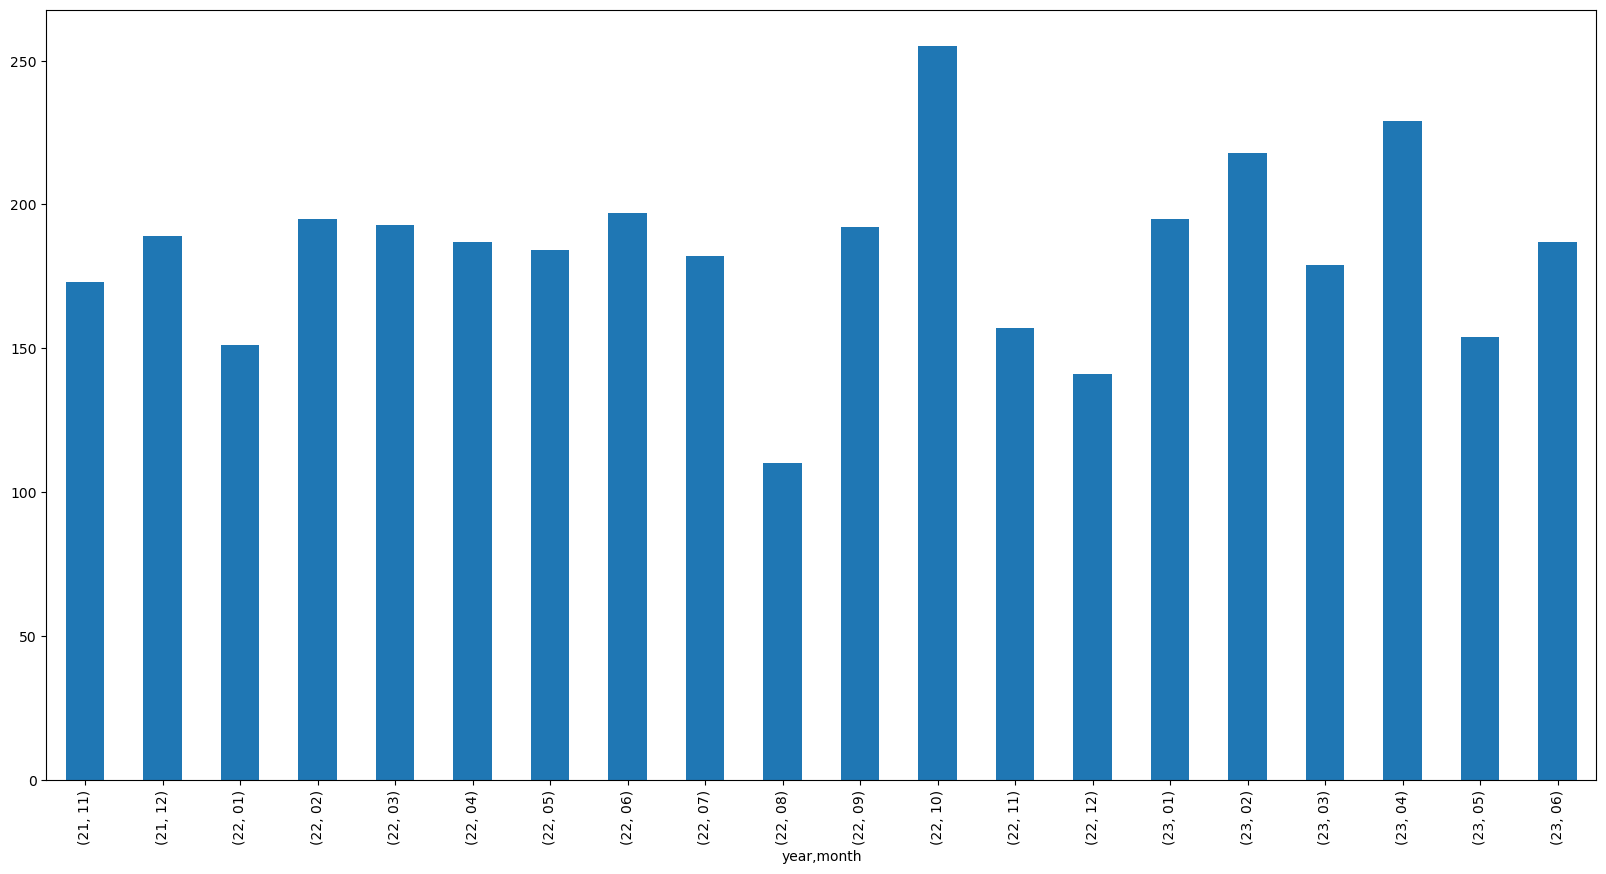

In [8]:
# a plot of the number of articles per month for each year
df['year'] = df['date'].apply(lambda x: x.split(' ')[0].split('/')[2])
df['month'] = df['date'].apply(lambda x: x.split(' ')[0].split('/')[1])

df.groupby(['year', 'month']).count()['title'].plot(kind='bar', figsize=(20,10))
plt.show()

# 2. Simulations
The simulation is reparted in 5 days, each day is reparted in 2 hours, one hour for the morning and one hour for the afternoon
The idea is to have different news for each simulation, so we will take 10 different periods of 2 months
We want the interface to show one article every 15-30 seconds so let's plot to verify that we have enough articles for each simulation

In [9]:
# create 10 dataframes, each one containing the articles of two months, for estimate the frequency of the articles per seconds for each simulation
df1 = df[(df['sorting'] >= 2111010000) & (df['sorting'] < 2201010000)]
df2 = df[(df['sorting'] >= 2201010000) & (df['sorting'] < 2203010000)]
df3 = df[(df['sorting'] >= 2203010000) & (df['sorting'] < 2205010000)]
df4 = df[(df['sorting'] >= 2205010000) & (df['sorting'] < 2207010000)]
df5 = df[(df['sorting'] >= 2207010000) & (df['sorting'] < 2209010000)]
df6 = df[(df['sorting'] >= 2209010000) & (df['sorting'] < 2211010000)]
df7 = df[(df['sorting'] >= 2211010000) & (df['sorting'] < 2301010000)]
df8 = df[(df['sorting'] >= 2301010000) & (df['sorting'] < 2303010000)]
df9 = df[(df['sorting'] >= 2303010000) & (df['sorting'] < 2305010000)]
df10 = df[(df['sorting'] >= 2305010000) & (df['sorting'] < 2307010000)]

Number of articles in df1: 362 => one article every 10 seconds during 1h
Number of articles in df2: 346 => one article every 10 seconds during 1h
Number of articles in df3: 380 => one article every 9 seconds during 1h
Number of articles in df4: 381 => one article every 9 seconds during 1h
Number of articles in df5: 292 => one article every 12 seconds during 1h
Number of articles in df6: 447 => one article every 8 seconds during 1h
Number of articles in df7: 298 => one article every 12 seconds during 1h
Number of articles in df8: 413 => one article every 9 seconds during 1h
Number of articles in df9: 408 => one article every 9 seconds during 1h
Number of articles in df10: 341 => one article every 11 seconds during 1h


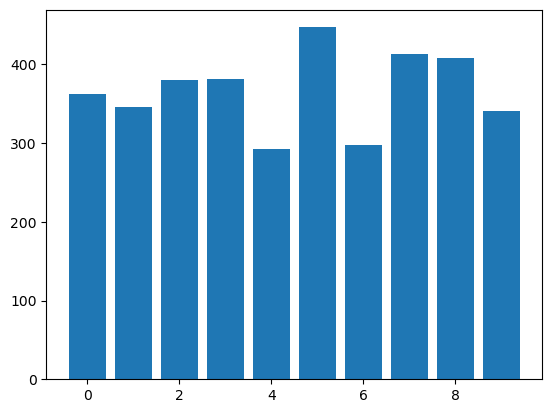

In [10]:
# a plot of the number of articles per dataframe
lengths = []
for i in range(10):
    dfs = eval('df' + str(i+1))
    print("Number of articles in df" + str(i+1) + ": " + str(len(dfs)) + " => one article every " + str((round(3600/(len(dfs))))) + " seconds during 1h")
    lengths.append(len(dfs))
plt.bar(range(10), lengths)
plt.show()

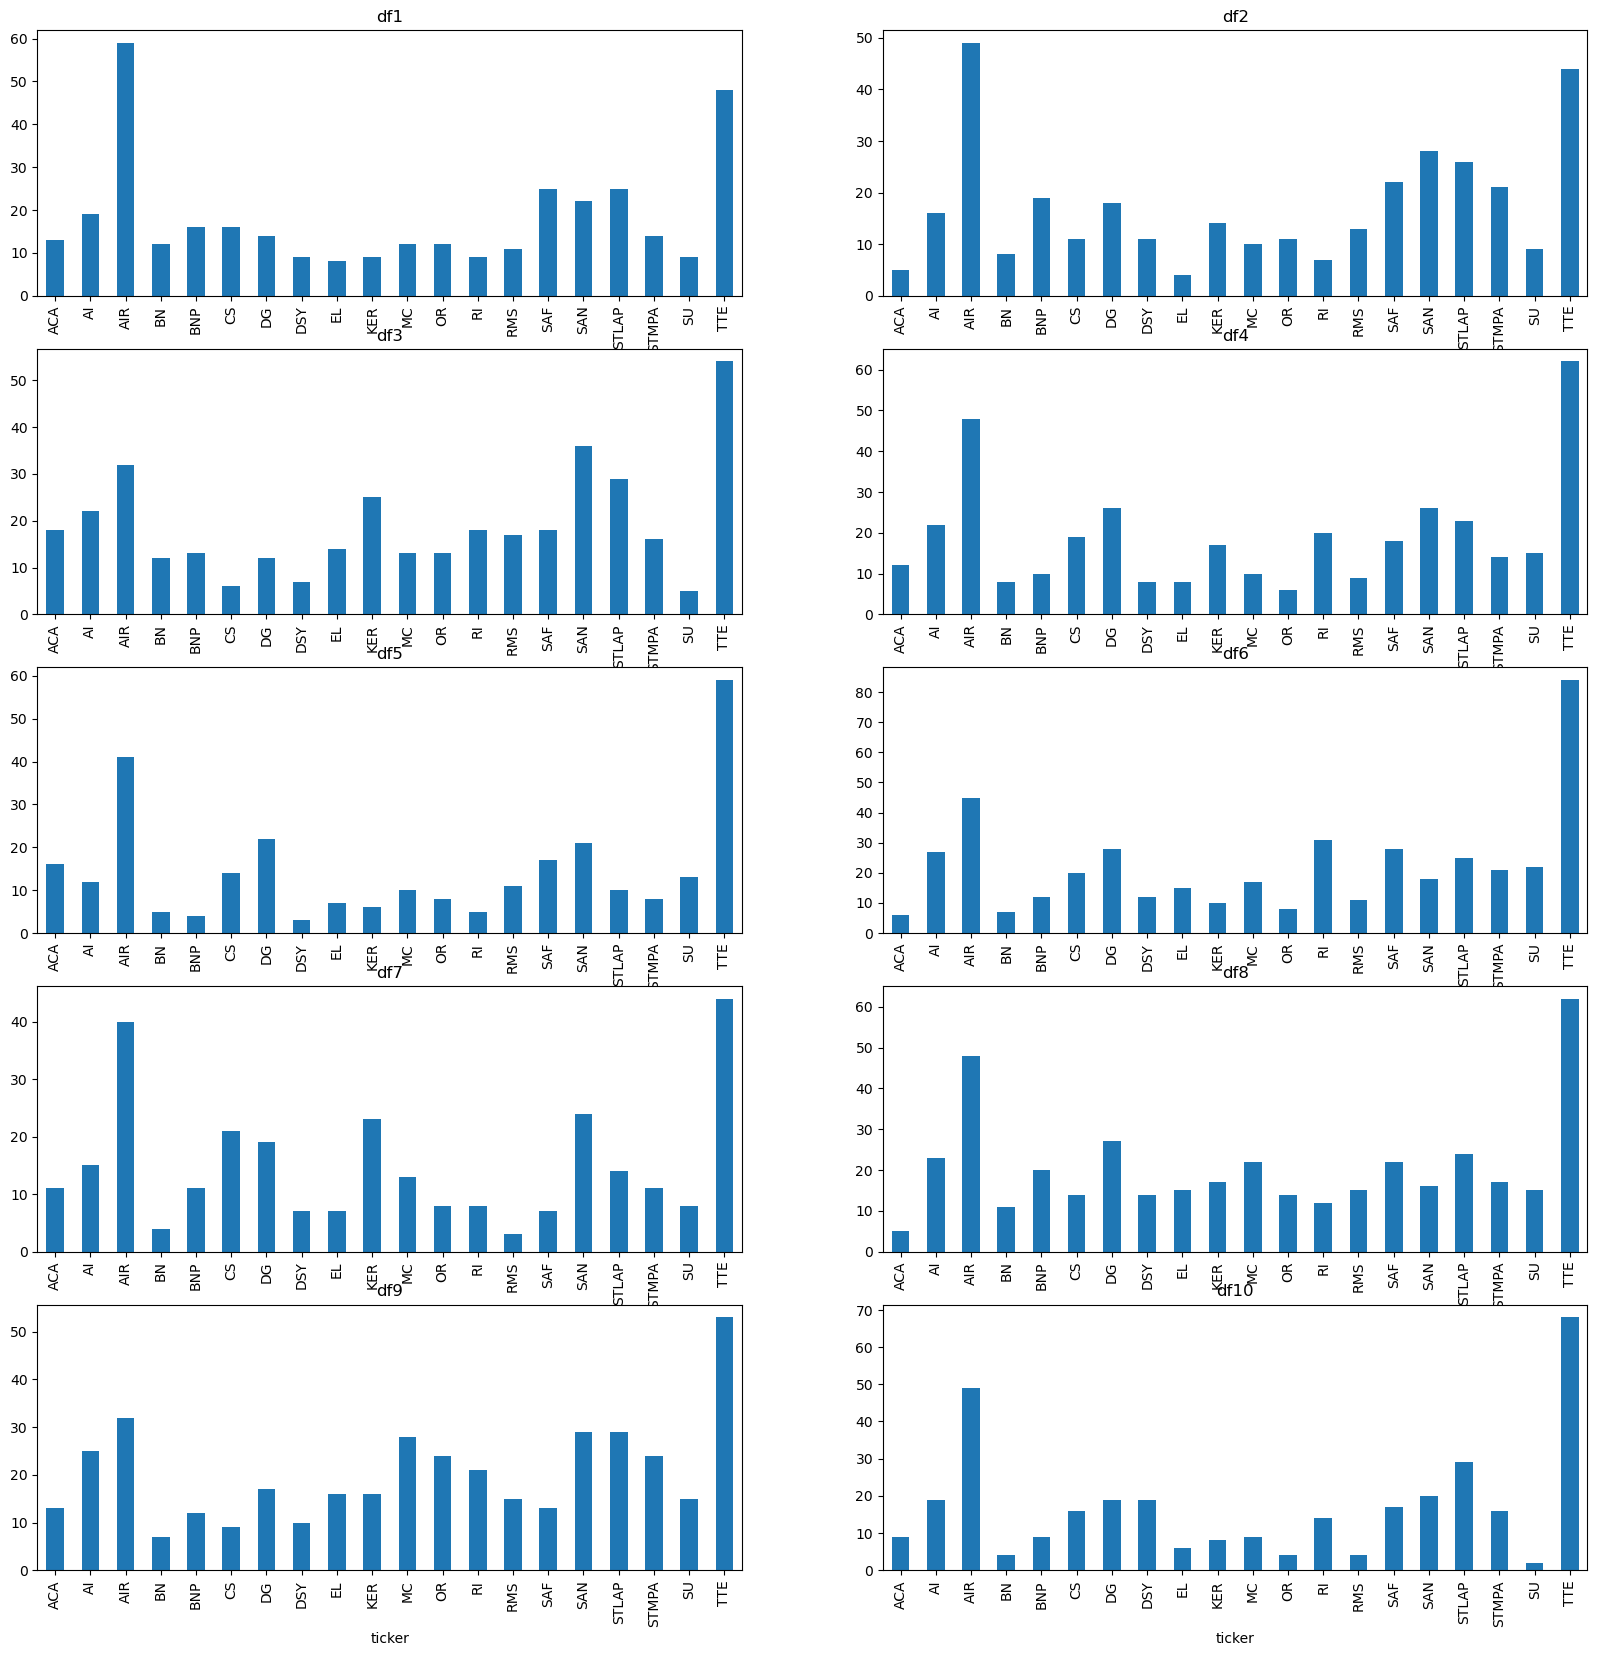

In [11]:
# for each dataframe, plot the number of articles per ticker
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
for i in range(10):
    dfs = eval('df' + str(i+1))
    dfs.groupby(['ticker']).count()['title'].plot(kind='bar', ax=axs[i//2, i%2], title='df' + str(i+1))
plt.show()

# 3. Export
We will export the dataframe in a csv file, ordered by date
(we will remove the columns year, month and sorting, they are only used for the order)

In [12]:
# save the ordered dataframe in a csv file
df = df.drop(['year', 'month', 'sorting'], axis=1)
df.to_csv('scraping_sorted.csv', sep=';', encoding='utf-8 sig', index=False)